# Question 0 （這題沒做成績歸零）

請承諾在本次考試，你不會靠別人的幫助完成作答。（請將承諾打在下方。）

本人何子安承諾在本次考試，我不會靠別人的幫助完成作答。

# Question 1 （簡答題，請不要抄PPT的内容，用自己的話寫。）(40%)


1.   請簡單敘述svm如何解決線性不可分割資料的分類問題。(8%)

2.   請簡單描述KNN為什麼不適合處理高維度資料。(8%)

3.   請分別簡述類神經網路中前傳遞(forward)與倒傳遞(backpropagation)的作用。(8%)

4.   請簡述kernel在卷積層中的作用。(8%)

5.   請簡述類神經網路相對於線性模型的優點及缺點(請至少各列出1點）。(8%)

1. 如果為線性不可分的資料（不能被一條線完美分割的資料），有時可以試著把資料轉換到更高維度空間。比如在有些一維的資料中並不存在超平面，但如果把資料中的每個x都映射到更高維中，也許就能找到了。運用不同的kernel functions，可以計算更高維度空間中的點積，然後再找出超平面。
2. KNN會算出點與點之間的距離，找出k個最相近的點。但在高維度空間中，每個點之間的距離遠近關係，差異會變得很不明顯，因此所謂的最相近會隨之變得越來越沒有意義，同時高維度空間的資料點分佈也會顯得稀疏。
3. forward指的是按前至後（從輸入層到輸出層）計算和儲存NN中每一層的結果。
backpropagation則是計算NN參數梯度並且更新它的方法（用chain rule按相反的順序儲存計算某些參數梯度時需要的偏導數）。
4. kernel可以某程度上「認得」形狀，因為形狀應該會含有一些重要的空間訊息，如果像全連結層那樣壓縮拉長圖片資料，圖片的資訊會被扭曲，所以kernel是用來盡可能的正確理解圖像的形狀特徵的數據。類似滑動窗口的概念將kernel值與圖片值做計算，將結果存到對應位置（有點像將圖片降維）。
5. 
- 優點：
    - 能充分逼近/擬合/分類複雜的非線性關係
    - 即使樣本數很多，效率也比線性模型高
    - 能完成較複雜的任務
    - 線性模型如SVM容易有維度災難
- 缺點：
    - 需要很多的超參數
    - 計算量很多，需要大量電腦資源支撐
    - 學習時間過長，可能會over-fitting
    - 可能會有local minima的問題

# Question 2 (CNN)(60%)

## 0.讀資料

In [39]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#此區請勿修改
(train_x,train_y), (test_x,test_y) = cifar10.load_data()

## 1.資料探索與前處理(30%)

* 請回報cifar10資料集中**train**共有幾筆資料，以其各類的數量(3%)
* 請回報cifar10資料集中**test**共有幾筆資料，以其各類的數量(3%)
* 請回報cifar10資料集中圖片的形狀(寬、高、通道)(6%)
* 請將**train**與**test**中圖片數值進行標準化(將0-255 壓縮至 0-1之間)(9%)
* 請將**train**與**test**中label進行one-hot encoding，並將**train**中第2021的數值(index=2020)轉換前後的值印出(9%)

|編號|名稱|
|-|-|
|0|airplane|
|1|automobile|
|2|bird|
|3|cat|
|4|deer|
|5|dog|
|6|frog|
|7|horse|
|8|ship|
|9|truck|


* 請回報cifar10資料集中**train**共有幾筆資料，以其各類的數量

In [3]:
from collections import Counter
print(f'train data size: {len(train_x)}')

labels_train = [i[0] for i in train_y]
print(f'number of classes in train data: {Counter(labels_train)}')

train data size: 50000
number of classes in train data: Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})


* 請回報cifar10資料集中**test**共有幾筆資料，以其各類的數量

In [4]:
print(f'test data size: {len(test_x)}')

labels_test = [i[0] for i in test_y]
print(f'number of classes in test data: {Counter(labels_test)}')

test data size: 10000
number of classes in test data: Counter({3: 1000, 8: 1000, 0: 1000, 6: 1000, 1: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 2: 1000})


* 請回報cifar10資料集中圖片的形狀(寬、高、通道)

In [5]:
size, length, height, channel = train_x.shape
print(f'寬: {length}, 高: {height}, 通道: {channel}')

寬: 32, 高: 32, 通道: 3


* 請將**train**與**test**中圖片數值進行標準化(將0-255 壓縮至 0-1之間)

In [6]:
train_x_standardized = train_x / 255
test_x_standardized = test_x / 255

* 請將**train**與**test**中label進行one-hot encoding，並將**train**中第2021的數值(index=2020)轉換前後的值印出

In [7]:
from keras.utils import np_utils

train_y_onehot = np_utils.to_categorical(train_y)
test_y_onehot = np_utils.to_categorical(test_y)

print('before onehot:', train_y[2020])
print('after onehot:', train_y_onehot[2020])

before onehot: [9]
after onehot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## 2.模型建構與測試(30%)
* 請建構一個CNN分類器，並用`summary`印出模型架構，並將標準化過與one-hot編碼過的train資料丟入訓練(若之後的**test accuracy**未達70%以上，則本小題得一半分數)(6%)
* 利用`matplotlib`繪製訓練過程中**accuracy**與**loss**的變化圖(6%)
* 分別將**train**與**test**資料放入訓練好的CNN分類器進行評估並輸出**accuracy**(6%)
* 請利用`predict`對**test**資料進行預測，輸出**test**中第667筆資料(index=666)的圖片，並利用`matplolib`中的長條圖輸出第667筆資料的各類別預測機率(6%)
* 請繪製**confusion matrix**(呈現方式不拘)(6%)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping

* 請建構一個CNN分類器，並用`summary`印出模型架構，並將標準化過與one-hot編碼過的train資料丟入訓練

In [9]:
model = Sequential()
model.add(
    Conv2D(input_shape=(length, height, channel), 
           filters=64, 
           kernel_size=(5, 5), 
           padding='same', 
           activation='relu'))
model.add(
    MaxPooling2D(pool_size=(2, 2))
)
model.add(
    Conv2D(filters=64, 
           kernel_size=(5, 5), 
           strides=1, 
           padding='same', 
           activation='relu'))
model.add(
    MaxPooling2D(pool_size=(2, 2))
)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(
    Dense(units=10, 
          activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [10]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)
early = EarlyStopping(
    monitor='accuracy', 
    min_delta=0.01, 
    patience=20, 
    verbose=1, 
    mode='auto'
)

In [11]:
history = model.fit(
    x=train_x_standardized, 
    y=train_y_onehot, 
    epochs=100, 
    callbacks=[early], 
    verbose=2
)

Epoch 1/100
1563/1563 - 13s - loss: 1.4820 - accuracy: 0.4715 - 13s/epoch - 8ms/step
Epoch 2/100
1563/1563 - 11s - loss: 1.1363 - accuracy: 0.5990 - 11s/epoch - 7ms/step
Epoch 3/100
1563/1563 - 11s - loss: 1.0069 - accuracy: 0.6513 - 11s/epoch - 7ms/step
Epoch 4/100
1563/1563 - 11s - loss: 0.9318 - accuracy: 0.6764 - 11s/epoch - 7ms/step
Epoch 5/100
1563/1563 - 11s - loss: 0.8757 - accuracy: 0.6976 - 11s/epoch - 7ms/step
Epoch 6/100
1563/1563 - 11s - loss: 0.8331 - accuracy: 0.7116 - 11s/epoch - 7ms/step
Epoch 7/100
1563/1563 - 11s - loss: 0.7940 - accuracy: 0.7233 - 11s/epoch - 7ms/step
Epoch 8/100
1563/1563 - 11s - loss: 0.7633 - accuracy: 0.7358 - 11s/epoch - 7ms/step
Epoch 9/100
1563/1563 - 11s - loss: 0.7375 - accuracy: 0.7425 - 11s/epoch - 7ms/step
Epoch 10/100
1563/1563 - 11s - loss: 0.7160 - accuracy: 0.7504 - 11s/epoch - 7ms/step
Epoch 11/100
1563/1563 - 11s - loss: 0.6905 - accuracy: 0.7584 - 11s/epoch - 7ms/step
Epoch 12/100
1563/1563 - 11s - loss: 0.6729 - accuracy: 0.7658 

* 利用`matplotlib`繪製訓練過程中**accuracy**與**loss**的變化圖

In [12]:
def show_train_history(train_history, train):
    plt.plot(train_history.history[train])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train'], loc='center right')
    plt.show()

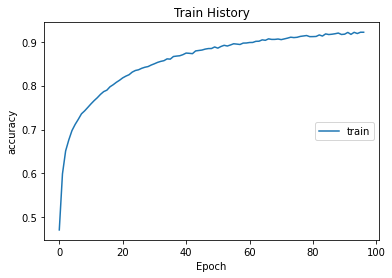

In [13]:
show_train_history(history, 'accuracy')

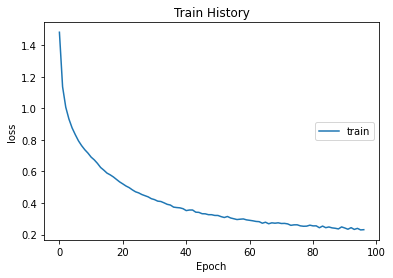

In [14]:
show_train_history(history, 'loss')

* 分別將**train**與**test**資料放入訓練好的CNN分類器進行評估並輸出**accuracy**

In [15]:
scores = model.evaluate(train_x_standardized, train_y_onehot)
print('on training data:')
for name, score in zip(model.metrics_names, scores):
    print(f'{name}: {score}')

1563/1563 [==============================] - 9s 6ms/step - loss: 0.0549 - accuracy: 0.9830
on training data:
loss: 0.054890841245651245
accuracy: 0.9830399751663208


In [16]:
scores = model.evaluate(test_x_standardized, test_y_onehot)
print('on test data:')
for name, score in zip(model.metrics_names, scores):
    print(f'{name}: {score}')

313/313 [==============================] - 2s 6ms/step - loss: 1.6299 - accuracy: 0.7135
on test data:
loss: 1.6298733949661255
accuracy: 0.7135000228881836


* 請利用`predict`對**test**資料進行預測，輸出**test**中第667筆資料(index=666)的圖片，並利用`matplolib`中的長條圖輸出第667筆資料的各類別預測機率

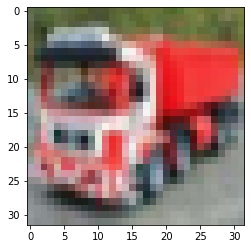

In [20]:
plt.imshow(test_x[666])
plt.show()

predict class: 9


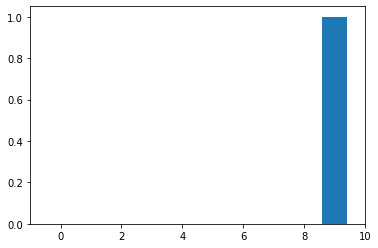

In [38]:
prediction = model.predict(test_x_standardized)
print(f'predict class: {np.argmax(prediction[666])}')

plt.bar(x=[i for i in range(len(prediction[666]))], 
        height=prediction[666])
plt.xlim([-1, 10])
plt.show()

* 請繪製**confusion matrix**(呈現方式不拘)

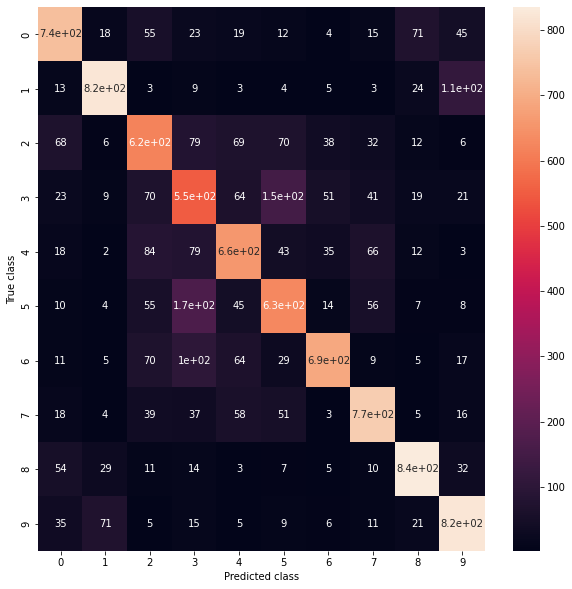

In [53]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(labels_test, [np.argmax(i) for i in prediction])
df = pd.DataFrame(matrix, columns=list(range(10)))
plt.figure(figsize=(10, 10))
sns.heatmap(df, annot=True)
plt.ylabel('True class'), plt.xlabel('Predicted class')
plt.show()